In [1]:
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
# https://machinelearningmastery.com/image-augmentation-deep-learning-keras/


In [1]:
from keras.preprocessing.image import ImageDataGenerator  #this is used for image augmenting
from matplotlib import pyplot   # for plotting images of digits

Using TensorFlow backend.


In [2]:
 # Import packages and set numpy random seed
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
# np.random.seed(5) 
import tensorflow as tf
tf.set_random_seed(2)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import regularizers

In [3]:
# We will first write a function to read images and convert those into vector form

train_dir = '/Users/fadhlihajar/Desktop/Capstone/ArSL1/train'
test_dir = '/Users/fadhlihajar/Desktop/Capstone/ArSL1/test'

def load_data():
    images = []
    labels = []
    size = 64,64
    print("LOADING DATA FROM : ",end = "")
    for folder_index, folder in enumerate(os.listdir(train_dir)):
        print(folder, end = ' | ')
        for image in os.listdir(train_dir + "/" + folder):
            temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(folder_index)
        
    images = np.array(images)
    images = images.astype('float32')/255.0
    
    labels = keras.utils.to_categorical(labels)   #one-hot encoding
    
    X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.1)
    
    print()
    print('Loaded', len(X_train),'images for training,','Train data shape =',X_train.shape)
    print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, X_test, Y_train, Y_test

In [4]:
x_train, x_test, y_train, y_test = load_data()

LOADING DATA FROM : bb | dha | dhad | ain | ya | seen | sheen | haa | fa | meem | la | nun | kaaf | aleff | taa | 
Loaded 20559 images for training, Train data shape = (20559, 64, 64, 3)
Loaded 2285 images for testing Test data shape = (2285, 64, 64, 3)


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20559, 64, 64, 3)
(2285, 64, 64, 3)
(20559, 15)
(2285, 15)


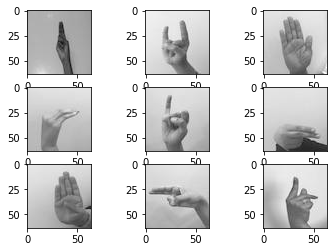

In [6]:
# Actual dataset
for i in range(0,9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(x_train[i], cmap = pyplot.get_cmap('gray'))
pyplot.show()

## Random Rotations

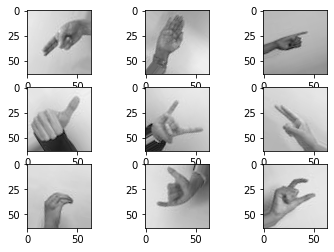

In [10]:
# reshape to be [samples][width][height][channels]
x_train = x_train.reshape((x_train.shape[0], 64, 64, 3))
x_test = x_test.reshape((x_test.shape[0], 64, 64, 3))
# convert from int to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i], cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [ ]:
# configure batch size and retrieve one batch of images + save this images 
os.makedirs('AugImagesRR')
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=44000, save_to_dir='AugImagesRR', save_prefix='aug', save_format='jpg'):

In [11]:
def build_model():
    
    model = Sequential()
    
    model.add(Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (64,64,3)))
    model.add(Conv2D(32, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = 3, padding = 'same', strides = 2 , activation = 'relu'))
    model.add(MaxPool2D(3))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation = 'relu'))
    model.add(Dense(15, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

In [12]:
def fit_model():
    history = model.fit(x_train, y_train, batch_size = 64, epochs = 5, validation_split = 0.1)
    return history

In [13]:
model = build_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

MODEL CREATED
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
________________________

In [14]:
model_history = fit_model()


Train on 18503 samples, validate on 2056 samples
Epoch 1/5
18503/18503 [==============================] - 160s 9ms/step - loss: 2.0859 - accuracy: 0.3048 - val_loss: 2.2805 - val_accuracy: 0.2398
Epoch 2/5
18503/18503 [==============================] - 162s 9ms/step - loss: 0.7000 - accuracy: 0.7703 - val_loss: 1.2299 - val_accuracy: 0.5574
Epoch 3/5
18503/18503 [==============================] - 162s 9ms/step - loss: 0.3830 - accuracy: 0.8783 - val_loss: 0.3540 - val_accuracy: 0.9042
Epoch 4/5
18503/18503 [==============================] - 163s 9ms/step - loss: 0.2795 - accuracy: 0.9127 - val_loss: 0.5440 - val_accuracy: 0.8113
Epoch 5/5
18503/18503 [==============================] - 168s 9ms/step - loss: 0.2290 - accuracy: 0.9280 - val_loss: 0.7388 - val_accuracy: 0.7515


In [15]:
if model_history:
    print('Final Accuracy: {:.2f}%'.format(model_history.history['accuracy'][4] * 100))
    print('Validation Set Accuracy: {:.2f}%'.format(model_history.history['accuracy'][4] * 100))

Final Accuracy: 92.80%
Validation Set Accuracy: 92.80%
